In [ ]:
#Katherine Brenner
#Lab 3- Analyzing Daily PM2.5 Distribution in California Counties

In [81]:
#Exploring CA county PM2.5 distribution Using Pandas

#Read PM2.5data csv File
import pandas as pd
df = pd.read_csv(r'C:/Users/14423/Documents/socialexplorer.csv')
#look at data
df.shape
df.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,dailypm,drinkingwater,housing,drivealone,longcommute,percentlongcommute
0,6001,Alameda County,"Alameda County, California",6,1,8.46,NaN,25.094588,64.429493,451989,41.5
1,6003,Alpine County,"Alpine County, California",6,3,10.32,NaN,14.285714,55.785124,270,53.8
2,6005,Amador County,"Amador County, California",6,5,9.40,NaN,21.812434,77.647654,9216,40.1
3,6007,Butte County,"Butte County, California",6,7,8.93,NaN,23.720247,74.137587,63163,21.5
4,6009,Calaveras County,"Calaveras County, California",6,9,9.54,NaN,21.025779,77.310111,12784,52.3


In [82]:
# look at the data types
df.info(verbose=True, null_counts=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geo_FIPS            58 non-null     int64  
 1   Geo_NAME            58 non-null     object 
 2   Geo_QNAME           58 non-null     object 
 3   Geo_STATE           58 non-null     int64  
 4   Geo_COUNTY          58 non-null     int64  
 5   dailypm             58 non-null     float64
 6   drinkingwater       0 non-null      float64
 7   housing             58 non-null     float64
 8   drivealone          58 non-null     float64
 9   longcommute         58 non-null     int64  
 10  percentlongcommute  58 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 5.1+ KB


C:\Users\14423\AppData\Local\Temp/ipykernel_19724/1294768778.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [83]:
# get some stats and look into data more
df['dailypm'].describe()
# list of additional columns to drop
columns_to_drop = ['Geo_QNAME', 'drinkingwater']
# drop columns
df = df.drop(columns_to_drop,axis=1)
df.head()

,Geo_FIPS,Geo_NAME,Geo_STATE,Geo_COUNTY,dailypm,housing,drivealone,longcommute,percentlongcommute
0,6001,Alameda County,6,1,8.46,25.094588,64.429493,451989,41.5
1,6003,Alpine County,6,3,10.32,14.285714,55.785124,270,53.8
2,6005,Amador County,6,5,9.40,21.812434,77.647654,9216,40.1
3,6007,Butte County,6,7,8.93,23.720247,74.137587,63163,21.5
4,6009,Calaveras County,6,9,9.54,21.025779,77.310111,12784,52.3


In [84]:
#change data frame type
df = pd.read_csv(
    r'C:/Users/14423/Documents/socialexplorer.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [85]:
columns = list(df) # list the column types
columns

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QNAME',
 'Geo_STATE',
 'Geo_COUNTY',
 'dailypm',
 'drinkingwater',
 'housing',
 'drivealone',
 'longcommute',
 'percentlongcommute']

In [86]:
#change column names so I can join the fips
df.columns =['FIPS',
 'Geo_NAME',
 'Geo_QNAME',
 'Geo_STATE',
 'Geo_COUNTY',
 'dailypm',
 'drinkingwater',
 'housing',
 'drivealone',
 'longcommute',
 'percentlongcommute']

In [87]:
#look at data again

df.head()

,FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,dailypm,drinkingwater,housing,drivealone,longcommute,percentlongcommute
0,6001,Alameda County,"Alameda County, California",6,1,8.46,NaN,25.094588,64.429493,451989,41.5
1,6003,Alpine County,"Alpine County, California",6,3,10.32,NaN,14.285714,55.785124,270,53.8
2,6005,Amador County,"Amador County, California",6,5,9.40,NaN,21.812434,77.647654,9216,40.1
3,6007,Butte County,"Butte County, California",6,7,8.93,NaN,23.720247,74.137587,63163,21.5
4,6009,Calaveras County,"Calaveras County, California",6,9,9.54,NaN,21.025779,77.310111,12784,52.3


In [88]:
#check how many rows are in the data
len(df)

58

In [95]:
#add a zero to the fip so I can join to the geojson
df['FIPS'] = df['FIPS'].apply(lambda x: x.zfill(5))
print(df)


     FIPS                Geo_NAME                           Geo_QNAME  \
0   06001          Alameda County          Alameda County, California   
1   06003           Alpine County           Alpine County, California   
2   06005           Amador County           Amador County, California   
3   06007            Butte County            Butte County, California   
4   06009        Calaveras County        Calaveras County, California   
5   06011           Colusa County           Colusa County, California   
6   06013     Contra Costa County     Contra Costa County, California   
7   06015        Del Norte County        Del Norte County, California   
8   06017        El Dorado County        El Dorado County, California   
9   06019           Fresno County           Fresno County, California   
10  06021            Glenn County            Glenn County, California   
11  06023         Humboldt County         Humboldt County, California   
12  06025         Imperial County         Imperial 

In [96]:
#make sure the data has a leading zero
df.head()

,FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,dailypm,drinkingwater,housing,drivealone,longcommute,percentlongcommute
0,06001,Alameda County,"Alameda County, California",6,1,8.46,NaN,25.094588,64.429493,451989,41.5
1,06003,Alpine County,"Alpine County, California",6,3,10.32,NaN,14.285714,55.785124,270,53.8
2,06005,Amador County,"Amador County, California",6,5,9.40,NaN,21.812434,77.647654,9216,40.1
3,06007,Butte County,"Butte County, California",6,7,8.93,NaN,23.720247,74.137587,63163,21.5
4,06009,Calaveras County,"Calaveras County, California",6,9,9.54,NaN,21.025779,77.310111,12784,52.3


In [97]:
#use geopandas to map
import geopandas as gpd


In [98]:
# read in a geojson file downloaded from the github CA counties 
tracts=gpd.read_file('C:/Users/14423/Documents/cacounties.geojson')
tracts.head()



,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,107,00277318,06107,Tulare,Tulare County,06,H1,G4020,None,47300,None,A,-2.147484e+09,37391604.0,+36.2288317,-118.7810618,"POLYGON ((-119.47500 36.39000, -119.47500 36.4..."
1,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,-2.147484e+09,43810423.0,+38.1846184,-120.5593996,"POLYGON ((-120.85300 38.00900, -120.93900 38.0..."
2,06,047,00277288,06047,Merced,Merced County,06,H1,G4020,None,32900,None,A,-2.147484e+09,112760479.0,+37.1948063,-120.7228019,"POLYGON ((-121.22300 37.13800, -120.96400 37.3..."
3,06,079,00277304,06079,San Luis Obispo,San Luis Obispo County,06,H1,G4020,None,42020,None,A,-2.147484e+09,820974619.0,+35.3852268,-120.4475409,"POLYGON ((-120.71900 35.11000, -120.80000 35.1..."
4,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,-2.147484e+09,497530414.0,+38.5250258,-122.9376050,"POLYGON ((-123.26900 38.80800, -123.13600 38.8..."


In [99]:
# learn more about this dataset
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   58 non-null     object  
 1   COUNTYFP  58 non-null     object  
 2   COUNTYNS  58 non-null     object  
 3   GEOID     58 non-null     object  
 4   NAME      58 non-null     object  
 5   NAMELSAD  58 non-null     object  
 6   LSAD      58 non-null     object  
 7   CLASSFP   58 non-null     object  
 8   MTFCC     58 non-null     object  
 9   CSAFP     25 non-null     object  
 10  CBSAFP    46 non-null     object  
 11  METDIVFP  7 non-null      object  
 12  FUNCSTAT  58 non-null     object  
 13  ALAND     58 non-null     float64 
 14  AWATER    58 non-null     float64 
 15  INTPTLAT  58 non-null     object  
 16  INTPTLON  58 non-null     object  
 17  geometry  58 non-null     geometry
dtypes: float64(2), geometry(1), object(15)
memory usage: 8.3+ KB


C:\Users\14423\AppData\Local\Temp/ipykernel_19724/4166793285.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  tracts.info(verbose=True, null_counts=True)


In [100]:
#Create a new column, combining the state and county fip code to create the fip column
tracts['FIPS']=tracts['STATEFP'].str.cat(tracts['COUNTYFP'])

In [101]:
#we only need the fips and geometry for this lab
tracts = tracts[['FIPS','geometry']]
tracts.head()

,FIPS,geometry
0,06107,"POLYGON ((-119.47500 36.39000, -119.47500 36.4..."
1,06009,"POLYGON ((-120.85300 38.00900, -120.93900 38.0..."
2,06047,"POLYGON ((-121.22300 37.13800, -120.96400 37.3..."
3,06079,"POLYGON ((-120.71900 35.11000, -120.80000 35.1..."
4,06097,"POLYGON ((-123.26900 38.80800, -123.13600 38.8..."


<AxesSubplot:>

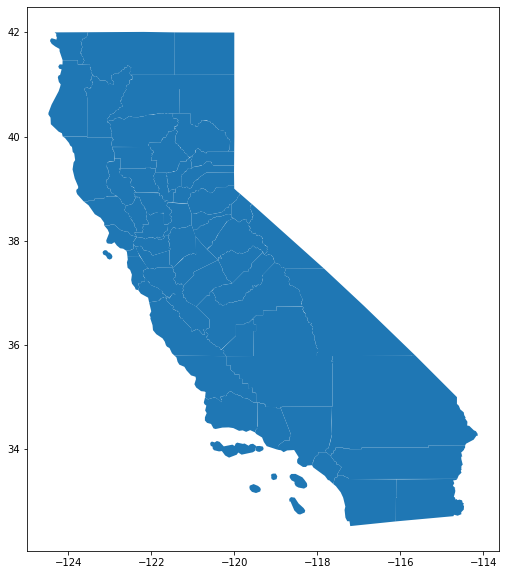

In [102]:
#plot what geojson file looks like
tracts.plot(figsize=(12,10))

In [103]:
# create a new dataframe based on the join
tracts_pm=tracts.merge(df,on="FIPS")

<AxesSubplot:>

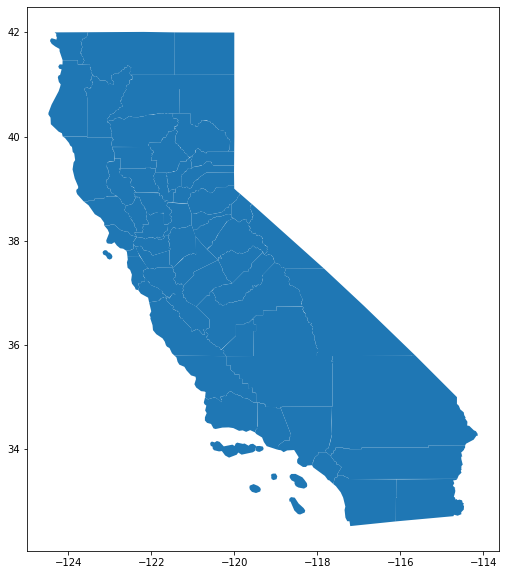

In [104]:
#Look at joined data
tracts_pm.head()

tracts.plot(figsize=(12,10))

<AxesSubplot:>

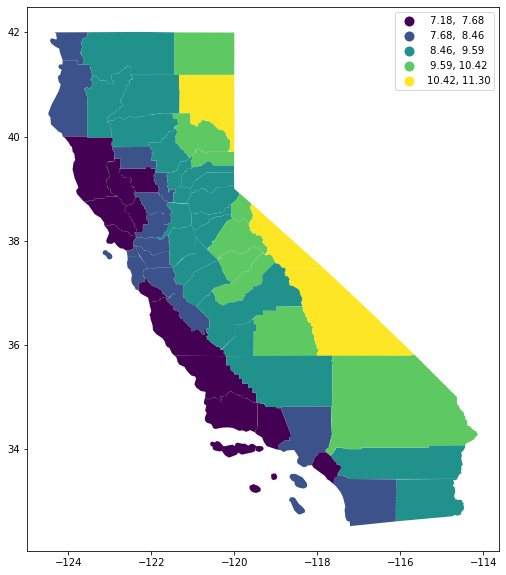

In [105]:
tracts_pm[tracts_pm.dailypm > 0].plot(figsize=(12,10),
                                             column='dailypm',
                                             legend=True, 
                                             scheme='NaturalBreaks')

<AxesSubplot:>

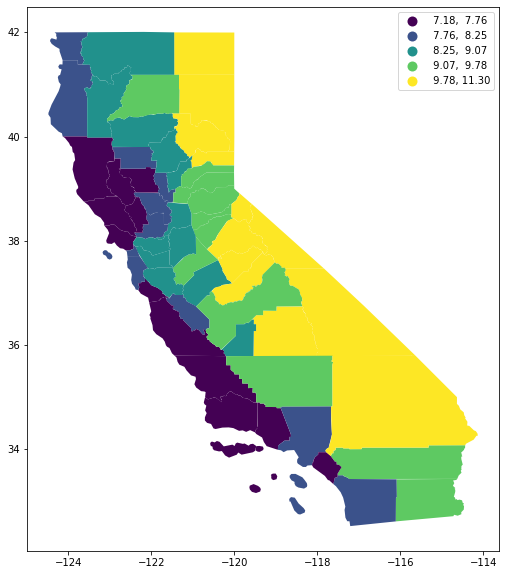

In [106]:
tracts_pm[tracts_pm.dailypm > 0].plot(figsize=(12,10),
                                             column='dailypm',
                                             legend=True, 
                                             scheme='quantiles')

<AxesSubplot:>

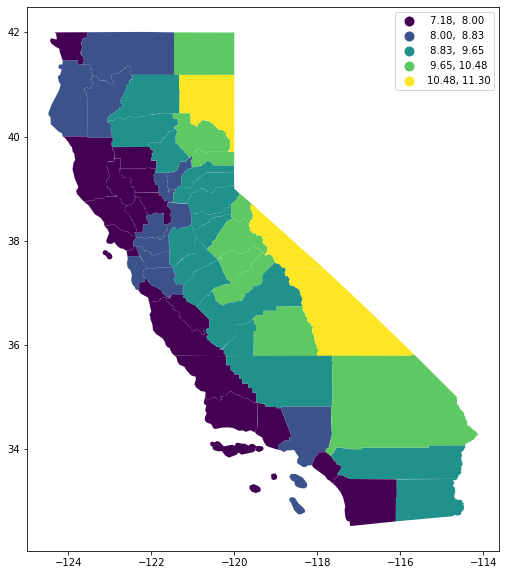

In [107]:
tracts_pm[tracts_pm.dailypm > 0].plot(figsize=(12,10),
                                             column='dailypm',
                                             legend=True, 
                                             scheme='equal_interval')

<AxesSubplot:>

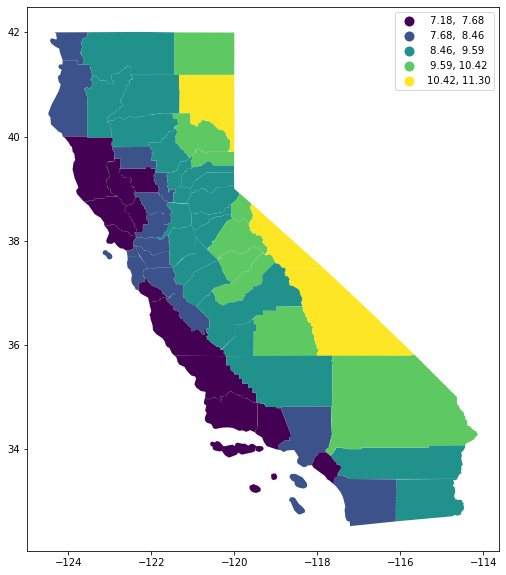

In [109]:
tracts_pm[tracts_pm.dailypm > 5].plot(figsize=(12,10),
                                             column='dailypm',
                                             legend=True, 
                                             scheme='NaturalBreaks')